# Scenario

In this exercise we are going to analyze and predict customer churcn for a mobile provider. 

We are going to apply the binary logistic regression BLR model to test this but first we must understand whether the data fulfills the six assumptions to build a reliable model:

* Dependent variable is binary
* Factor level 1 of the dependent variable should represent the desired outcome
* Only the meaningful variables based on your data analysis should be included
* The independend variables X should be independent of each other and the model should have little or no collinarity
* The independent variables X are linearly related to the log odds or the logarithm of the odds
* logistic regression requires large sample size relative to the data collected and the question to be solved

In [1]:
# Import the nessecary packages
import pandas as pd
import numpy as np

# Read the data in
data = pd.read_csv(r'C:\Users\patri\Desktop\LSE_CareerAccelerator\Course 3\Week 2\Data\customer_data.csv')

# Print the d table
print(data.info())
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Checking the logistic regression assumption

The first one is that the output is binary. The last column of the dataset is 'Target' and consists of binary dta. This shows whether clients have a connection with 1 being yes and 0 being no. So the desired outcome should be P(Y = 1) indicated in the 'Target' column. So the assumption 1 and assumption 2 are met

* A1: Binary logistic regression requires a dependent variable to be binary
* A2: For a binary logistic regression the factor level 1 of the dependent variable should represent the desired outcome. 

We also know that the data set is large based on the buisness question 

* A6: logistic regression requires large sample size relative to the data collected and the question to be solved

### Checking for meaningful variables Assumption 3

To find this assumption true, we need to investigate each of the columns and determine whether they should be included or not. 
If they contribute to a binary outcome they need to be included.

### Binary Data

For the model, it helps when we convert the categorical data into numerical ranges. if there are two categories we will use 0 and 1 of there are three we will use 00, 01, 10 or any combination of 0 and 1, this is easily created with **one hot encoding**

In [2]:
# The Edu column contains strings that can be converted into the numbers insted of strings of variable lengths. 

# Specify the EDU column and add/determine the values
data['Edu'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

 We can count the values and get 8 different columns. There are periods separating the words, 
 which is bad practise in Python. Let's remove them 

In [3]:
# Create two lists: one with initial and one with new values
initial_vals = ['illiterate', 'unknown', 'basic', 'high', 'university', 'professional']

new_vals = ['other', 'other', 'pre-school', 'high-school', 'uni', 'masters']

# Create a for loop to replace the values.
for old_val, new_val in zip(initial_vals, new_vals):
    data.loc[data['Edu'].str.contains(old_val), 'Edu'] = new_val
    
# Display all the unique values/check changes
data['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [4]:
# Check the .value_counts() summary with the changed column
data['Edu'].value_counts()

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

Now that we confirmed that the strings were converted to single unique values we can create dummy variables

## Convert strings into numbers

Using the sklearn library we have a class called LabelEncoder which we can use to convert column values into a number. 
Categorical values will become a column therefore better to use for ML models. 
Label Encoder does not retain any hierarchical relationship so if we have very good, good and bad it will sort them alphabetically. 

In [5]:
# Import the necessary packages, modules and classes from sklearn library
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

# Create a class and write a user defined function.
class MyLabelEncoder(LabelEncoder):
    
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# View the output.
data.select_dtypes(include='object')

,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Last_out
0,blue-collar,married,pre-school,yes,no,cellular,aug,thu,nonexistent
1,technician,married,other,no,no,cellular,nov,fri,nonexistent
2,management,single,uni,yes,no,cellular,jun,thu,success
3,services,married,high-school,no,no,cellular,apr,fri,nonexistent
4,retired,married,pre-school,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...
41183,retired,married,high-school,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,pre-school,no,no,telephone,may,thu,nonexistent
41185,admin.,single,uni,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,masters,no,yes,telephone,oct,tue,nonexistent


What we have done is, we produced a table with all the categorical values and have indicated that we want to transform them into unique values. Now we can start converting them into the dummy variables.

In [6]:
# Order lists of the values for each column containing strings
Edu_order = ['other', 'pre-school', 'high-school', 'uni', 'masters']
House_order = ['no', 'unknown', 'yes']
Loan_order = ['no', 'unknown', 'yes']
Month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
               'nov', 'dec']
DOW_order = ['mon', 'tue', 'wed', 'thu', 'fri']
Last_out_order = ['nonexistent', 'failure', 'success']

# List of values to transform into numbers even though the values are not ordered.
Occupation_list = ['unemployed', 'unknown', 'student', 'blue-collar',
                   'technician', 'housemaid', 'admin.','retired',
                   'self-employed', 'entrepreneur', 'management', 'services']
Status_list = ['unknown', 'single', 'divorced', 'married']
Comm_list = ['cellular', 'telephone']

# Create a list of all the list of values
Encoding_list = [Occupation_list, Status_list, Edu_order, House_order,
                 Loan_order, Comm_list, Month_order, DOW_order, Last_out_order]

In [7]:
# Now we pick the non-numerical columns 

object_cols = data.select_dtypes(include = 'object').columns

#Transform string values to number with our LabelEncoder function.
for idx in range(len(object_cols)): 
    
    le = MyLabelEncoder()
    le.fit(Encoding_list[idx])
    data[object_cols[idx]] = le.transform(data[object_cols[idx]])
    
# View the DataFrame.
data.head()

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,3,3,1,2,0,0,5,3,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,4,3,0,0,0,0,8,4,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,10,1,3,2,0,0,3,3,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,11,3,2,0,0,0,1,4,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,7,3,1,2,0,0,5,4,137,1,3,2,-2.9,92.201,-31.4,0.869,5076.2,1


### Balance the data

Before we can reate a Binary Logistic Regression we need to determine whether the data is balanced in the target column. 
An unbalanced data set is when the target variable has more observations in one class than the others. 

If a model is trained on an unbalanced data set it will return poor results, like inaccurately predicting a class or classifying unseen observations. 

Unbalanced data will affect the estimate of the model intercept and can cause skewedness in predicted probabilities. 

In [8]:
# Determine if values in a column are balanced
data['Target'].value_counts()

0    36548
1     4640
Name: Target, dtype: int64

Text(0.5, 1.0, 'Target Imbalance')

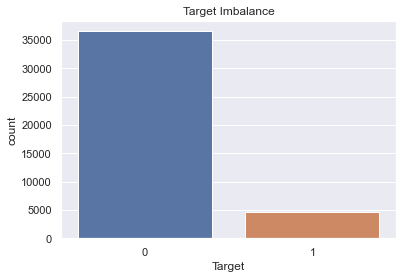

In [9]:
# Visualize the data in a column chart
import seaborn as sns

sns.set_theme(style = 'darkgrid')
ax = sns.countplot(x = 'Target', data = data)
ax.set_title('Target Imbalance')

It's pretty obvious that the target is not balanced since there are about 7 times more 0 than 1. 
We need to balance the data by importing some more libraries. 

* imblearn: handles unbalanced data and relies on scikitlearn
* scipy: for optimization, linear algebra, integration
* scikit-learn: gold standard for predictive data analytics
* SMOTE: Oversampling technique that creates new samples from existing data

The packages were installed in the anaconda prompt


SMOTE is an abbreviation for **Synthetic Minority Oversampling Technique** and describes a statistical solution for balancing data sets so that classes or categories are approximated and represented based on the approximations. 
SMOTE is a reliable oversampling technique that allows analysts to improve the predictive accuracy of their models by creating 'synthetic' examples of minority data

In [10]:
# Import all necessary packages
import statsmodels.api as sm
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Set the variables
X = data.drop('Target', axis = 1)
y = data['Target']

# Apply SMOTE as the target variable is not balances
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Specify the new data sets
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# Create two DataFrames for X and one for y
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns)

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# View DataFrame
print(os_data_X.head())
os_data_y.head()

C:\Users\patri\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


   Age  Occupation  Status  Edu  House  Loan  Comm  Month  DOW  Duration  \
0   31           4       1    3      0     0     0      8    1       259   
1   44           6       3    4      2     0     1      2    0       300   
2   43          10       3    4      2     0     1      2    0       134   
3   35           3       3    1      0     0     0      8    1       169   
4   33           6       1    3      2     2     0      2    3       255   

   Campaign  PosDays  Last_out  Var_rate  Price_idx  Conf_idx  Month_rate  \
0         1      999         1      -0.1     93.200     -42.0       4.153   
1         1      999         0       1.1     93.994     -36.4       4.857   
2         1      999         0       1.1     93.994     -36.4       4.857   
3         2      999         0      -0.1     93.200     -42.0       4.153   
4         2      999         1      -1.8     92.893     -46.2       1.266   

   Quarterly_emp  
0         5195.8  
1         5191.0  
2         5191.0  
3   

,Target
0,0
1,0
2,0
3,0
4,0


In [11]:
# Determine if the values in a column are balanced by counting the values
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

Text(0.5, 1.0, 'New Balanced Target')

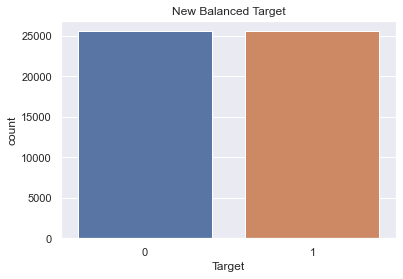

In [12]:
# Seems like it did the trick, we can visualize it for validation
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(x = 'Target', data = os_data_y)
ax.set_title('New Balanced Target')

### Interpretation

Assumption 3 is fulfilled that the analysis contains meaningful variables and are now balanced. 


We still need to check for two assumptions
* Independent Variables X should be independent from each other to limit multicollinearity
* Independent Variables X are linerarly related to the log odds

## Multicollinearity 

The Variance Inflation Factor VIF determines the degree of multicollinearity in Python. We want VIF to be lower than 10 to assume no multicollinearity, anything above 10 indicates strong correlation between the independend variables. A multicollinearity should be as close to 1 as possible and some researchers prefer a more lower threshold of 2.5 or 5.

In [13]:
# Import the VIF package
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe
vif_data = pd.DataFrame()
""" The column feature will represent the independent variables. 
    The VIF dataframe will consist of VIF value of each feature in a two-column table"""
vif_data['feature'] = data.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(data.values, i)
                        for i in range(len(data.columns))]

# View the output 
vif_data

,feature,VIF
0,Age,18.783790
1,Occupation,5.169369
2,Status,9.154831
3,Edu,5.084178
4,House,2.206817
5,Loan,1.207593
6,Comm,3.863707
7,Month,7.971358
8,DOW,2.975899
9,Duration,2.451436


In [14]:
# We now need to drop the columns with very high VIF values. We do that to avoid multicollinearity problems
data = data.drop(['Price_idx', 'Quarterly_emp'], axis = 1)

# View the DataFrame
print(data.shape)
data.head()

(41188, 17)


,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Conf_idx,Month_rate,Target
0,44,3,3,1,2,0,0,5,3,210,1,999,0,1.4,-36.1,4.963,0
1,53,4,3,0,0,0,0,8,4,138,1,999,0,-0.1,-42.0,4.021,0
2,28,10,1,3,2,0,0,3,3,339,3,6,2,-1.7,-39.8,0.729,1
3,39,11,3,2,0,0,0,1,4,185,2,999,0,-1.8,-47.1,1.405,0
4,55,7,3,1,2,0,0,5,4,137,1,3,2,-2.9,-31.4,0.869,1


### Testing linearity with log odds

The Box-Tidwell test can be used to understand whether the independent variables are linearly related to the log odds. 
It only works on the continuous variables and since we only have one continuous variable column we can plot it (multiple linear regressions can not be visualized). 


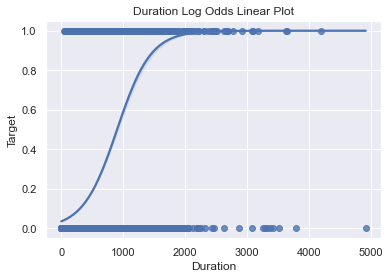

In [16]:
# We can also use Seaborn to visualize the regression between duration and target
dur = sns.regplot(x = 'Duration', y = 'Target', data = data, logistic = True).set_title('Duration Log Odds Linear Plot')

### Selecting necessary columns for BLR

All assumptions are now tested, we can then start selecting only the necessary columns since we won't need all of them. 
We run the logit function and summarize the model to then determine which columns we will use.

In [18]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = data.drop('Target', axis = 1).columns

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Target']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.338384
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51118
Method:                           MLE   Df Model:                           15
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5118
Time:                        17:46:06   Log-Likelihood:                -17303.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0293      0.001     23.046      0.000       0.027       0.032
Occupation    -0.0291      0.005     -5.403      0.000      -0.040      -0.019
Status        -0.4868      0.017    -28.393      0.000      -0.520      -0.453
Edu            0.0134      0.013      1.002      0.316      -0.013       0.040
House         -0.2209      0.015    -14.993      0.000      -0.250      -0.192
Loan          -0.3661      0.024    -15.456      0.000      -0.413      -0.320
Comm          -0.9993      0.043    -23.126      0.000      -1.084      -0.915
Month          0.0111      0.007      1.521      0.128      -0.003       0.025
DOW           -0.1811      0.011    -17.051      0.000      -0.202      -0.160
Duration       0.0068   7.09e-05     96.260      0.000       0.007       0.007
Campaign      -0.1539      0.009    -16.454      0.000      -0.172      -0.136
PosDays       -0.0031   9.17e-05    -33.709      0.000      -0.003      -0.003
Last_out      -0.8060      0.042    -19.122      0.000      -0.889      -0.723
Var_rate      -0.9291      0.025    -36.553      0.000      -0.979      -0.879
Conf_idx      -0.0146      0.002     -7.106      0.000      -0.019      -0.011
Month_rate     0.1745      0.025      7.079      0.000       0.126       0.223
==============================================================================
"""

### Interpretation
We have successfully built a BLR model, we can see the coefficients, standard errors and the p-values. 


## Determine the accuracy of the model

To check whether the model is working AND accurate we need to check if LogisticRegression is working.
We will apply the logistic regression and whether the function is active.

In [19]:
# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


### Interpretation

The accuracy is 86% which is a great fir for this business question and considering the dataset. If we had a quiestion for a business question based on a simple yes/no answer it may not be a good fit but if we can predict customer churn to 86% right we are already miles ahead of the game

## Confusion Matrix

A confusion matrix is a 2x2 table that checks whether the classification algorithm presicts the True and False values accurately. There are 4 outcomes

* True Positive (TP)
* True Negative (TN)
* False Positive (FP)
* False Negative (FN)

Each cell represents an actual number of observation in the given class. It shows more in detail what the prediction were for the tests.

There are some more figures that describe performance of the model
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
* Recall = TP / (TP + FN)
* Precision = TP / (TP + FP)
* F1 score = 2 * (Precision * Recall) / (Precision + Recall) ***F1 is the weighted average of precision and recall and is more useful than accuracy with problems with an uneven class distribution because it takes into account both false positives and false negatives. The best value is 1 and worst is 0.***

<AxesSubplot:>

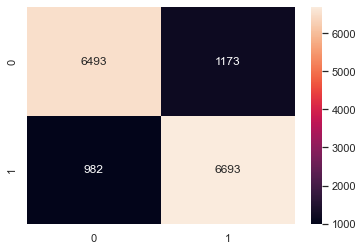

In [21]:
# Create the confusion matrix to test classification accuracy in BLR:
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [22]:
# To conclude we calculate the precision, recall, f1 score and support of the model 

# Import the necessary package
from sklearn.metrics import classification_report

# Print a report on the model's accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7666
           1       0.85      0.87      0.86      7675

    accuracy                           0.86     15341
   macro avg       0.86      0.86      0.86     15341
weighted avg       0.86      0.86      0.86     15341



### Concluding remarks

The high precision score of the model means it is accurate. This is an important metric as we need to use the model to select the most appropriate customers for the new project. In other cases the accuracy might be the most important criterion since we want to know how many instances of selecting a customer were correct.